<a href="https://colab.research.google.com/github/keziammanuela/KomputasiIntelegensiaTasks/blob/main/MidtermTask/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Midterm Task - YOLO**

Nama: Kezia Emmanuela Bangun

NPM: 2006572964

# Install and Import Required Libraries

In [39]:
# Install OpenCV for video processing
!pip install opencv-python-headless

# Install PyTorch with CUDA (GPU acceleration enabled)
# This installs the latest version with GPU support by default on Colab
!pip install torch torchvision torchaudio

# Install YOLO dependencies
!pip install ultralytics

# Install matplotlib
!pip install matplotlib

# Install PyYAML
!pip install PyYAML

# Install SORT tracker
!pip install filterpy

In [49]:
# Import Libraries
import cv2
import torch
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Set the backend to 'Agg'
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import yaml
from ultralytics import YOLO
from filterpy.kalman import KalmanFilter # Importing KalmanFilter from filterpy

In [3]:
# To confirm GPU is enabled
print("CUDA is available!" if torch.cuda.is_available() else "Running on CPU.")

CUDA is available!


#Load YOLOv5 Model

In [4]:
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install required dependencies
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [5]:
# Load YOLOv5 model with pretrained weights
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-2 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 214MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


# Load Data

In [6]:
# To mount Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Access files on your Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# To upload a video manually
from google.colab import files
uploaded = files.upload()  # Upload a video file

Saving object_detect.mp4 to object_detect.mp4


In [24]:
# Load the video
video_path = next(iter(uploaded))  # Get the path of the uploaded video
cap = cv2.VideoCapture(video_path)

# Detect Objects Frame by Frame Using YOLOv5

In [25]:
# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)  # Frame rate
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Frame width
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Frame height

# Initialize VideoWriter to save the output video
output_filename = 'output_video.mp4'  # Output video file name
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4
out = cv2.VideoWriter(output_filename, fourcc, fps, (width, height))

In [26]:
# Initialize a list to store detection results for each frame
all_detections = []

# Loop through frames in the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop if no frame is returned (end of video)

    # Run YOLO detection on the frame
    results = model(frame)

    # Extract relevant information for each detection
    frame_detections = []
    for result in results.xyxy[0]:  # Results in [x1, y1, x2, y2, confidence, class]
        x1, y1, x2, y2, confidence, class_id = result.tolist()
        label = model.names[int(class_id)]  # Get class label from model
        detection = {
            'box': [int(x1), int(y1), int(x2), int(y2)],
            'confidence': confidence,
            'label': label
        }
        frame_detections.append(detection)

    # Store the detections for this frame
    all_detections.append(frame_detections)

    # Draw bounding boxes and labels on the frame for display
    for det in frame_detections:
        cv2.rectangle(frame, (det['box'][0], det['box'][1]), (det['box'][2], det['box'][3]), (0, 255, 0), 2)
        cv2.putText(frame, f"{det['label']} {det['confidence']:.2f}", (det['box'][0], det['box'][1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Write the modified frame to the output video
    out.write(frame)

# Release the video capture and writer objects
cap.release()
out.release()

Streaming output truncated to the last 5000 lines.
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/

In [27]:
# Display output filename
print(f'Output video saved as: {output_filename}')

# Download the output video file
from google.colab import files
files.download(output_filename)

Output video saved as: output_video.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# Initialize a list to store all detections in a flat structure
detection_data = []

# Loop through all detections to flatten the list
for frame_detections in all_detections:
    for det in frame_detections:
        # Extract the required fields
        detection_data.append({
            'x1': det['box'][0],
            'y1': det['box'][1],
            'x2': det['box'][2],
            'y2': det['box'][3],
            'class': det['label'],
            'confidence': det['confidence']
        })

# Convert the list of dictionaries into a DataFrame
detections_df = pd.DataFrame(detection_data)

# Display the DataFrame
print(detections_df.head())

    x1   y1   x2   y2 class  confidence
0  223  541  375  736   car    0.885736
1  583  258  654  349   car    0.830849
2  323  275  452  492   bus    0.753619
3  391  207  465  301   car    0.740747
4  594  404  701  586   car    0.735513


In [31]:
# Save the DataFrame to a CSV file
detections_df.to_csv('detection_results.csv', index=False)

# Optional: Download the CSV file in Google Colab
from google.colab import files
files.download('detection_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Preprocess Object Detection Results

In [32]:
import pandas as pd

# Assuming 'detections_df' is the DataFrame with detection results
# Let's say the original video frame width and height are known
frame_width = 640  # Example width of the frame
frame_height = 480  # Example height of the frame

# Initialize a list to store preprocessed data
preprocessed_data = []

# Loop through each row in the detections DataFrame
for index, row in detections_df.iterrows():
    # Normalize bounding box coordinates
    x1_norm = row['x1'] / frame_width
    y1_norm = row['y1'] / frame_height
    x2_norm = row['x2'] / frame_width
    y2_norm = row['y2'] / frame_height

    # Create a unique identifier for each object
    object_id = f"{row['class']}_{index}"  # You can customize this ID as needed

    # Add preprocessed data to the list
    preprocessed_data.append({
        'object_id': object_id,
        'frame_index': index,  # This assumes the index corresponds to the frame number
        'x1': x1_norm,
        'y1': y1_norm,
        'x2': x2_norm,
        'y2': y2_norm,
        'class': row['class'],
        'confidence': row['confidence']
    })

In [33]:
# Convert preprocessed data into a DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data)

# Display the preprocessed DataFrame
print(preprocessed_df.head())

  object_id  frame_index        x1        y1        x2        y2 class  \
0     car_0            0  0.348438  1.127083  0.585938  1.533333   car   
1     car_1            1  0.910937  0.537500  1.021875  0.727083   car   
2     bus_2            2  0.504687  0.572917  0.706250  1.025000   bus   
3     car_3            3  0.610938  0.431250  0.726562  0.627083   car   
4     car_4            4  0.928125  0.841667  1.095312  1.220833   car   

   confidence  
0    0.885736  
1    0.830849  
2    0.753619  
3    0.740747  
4    0.735513  


# Result Traffic Object Detection

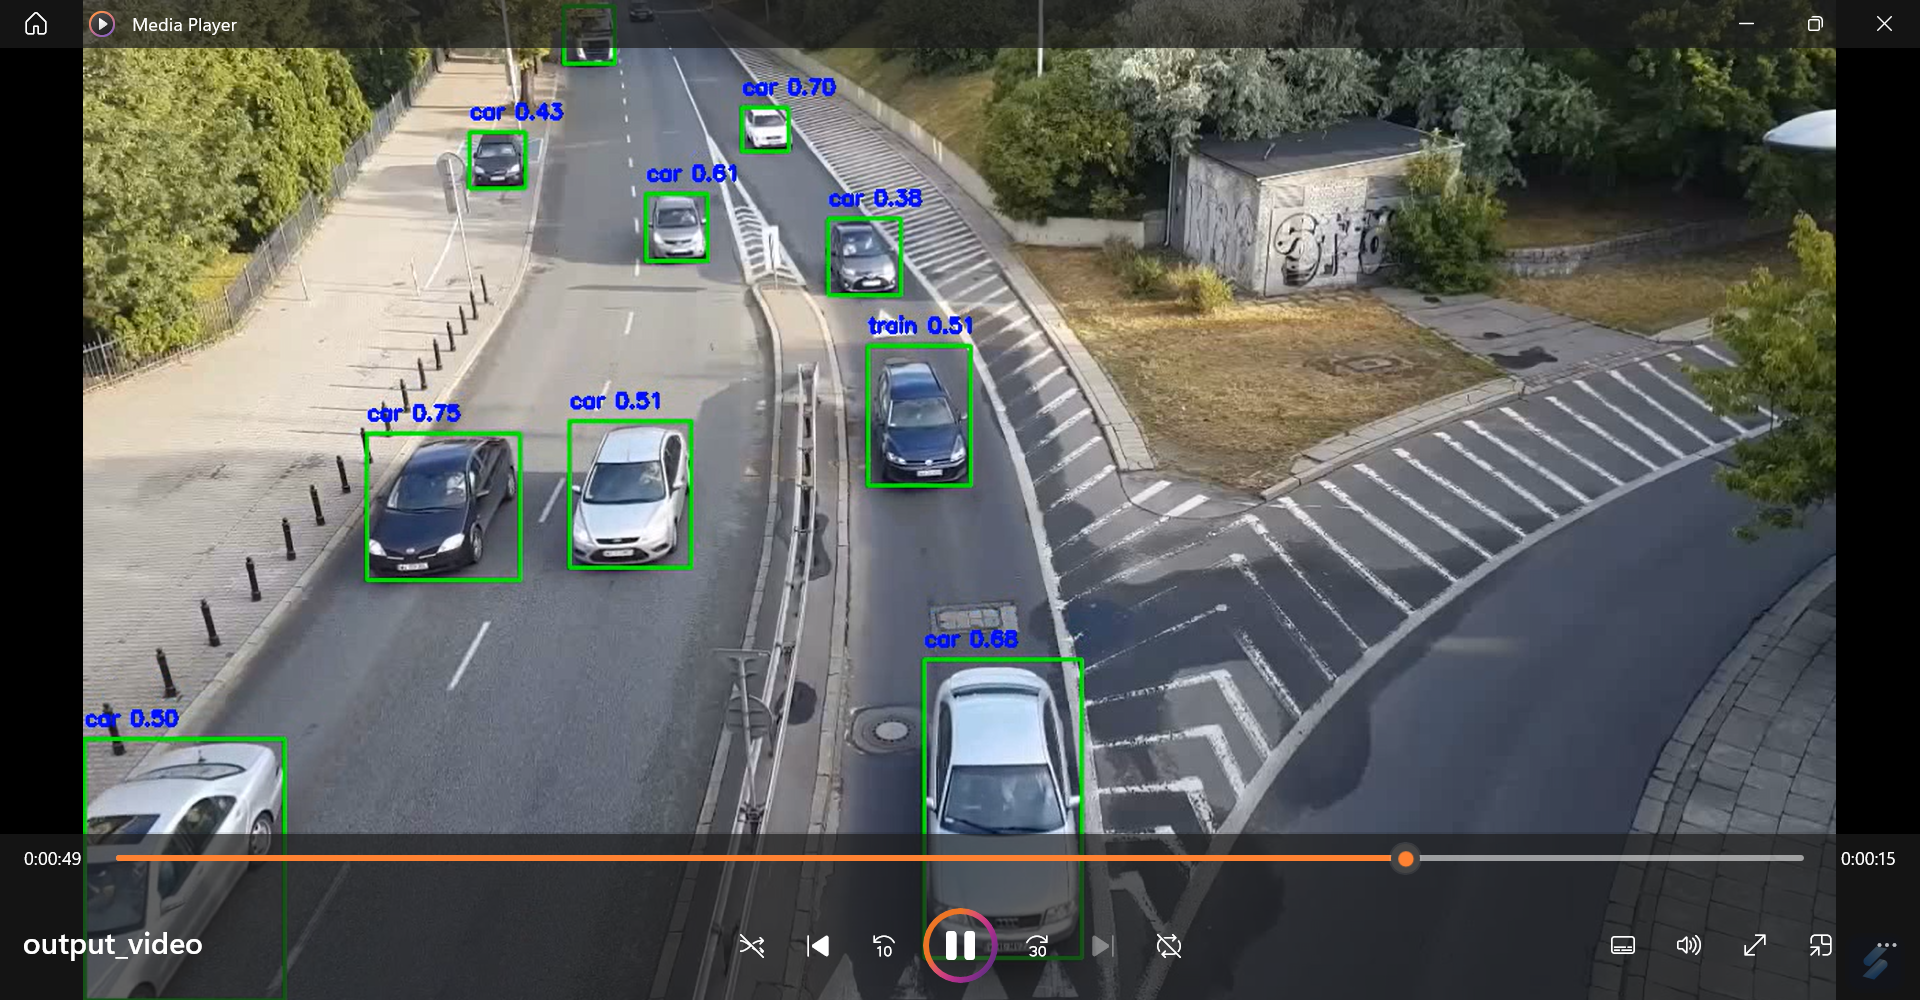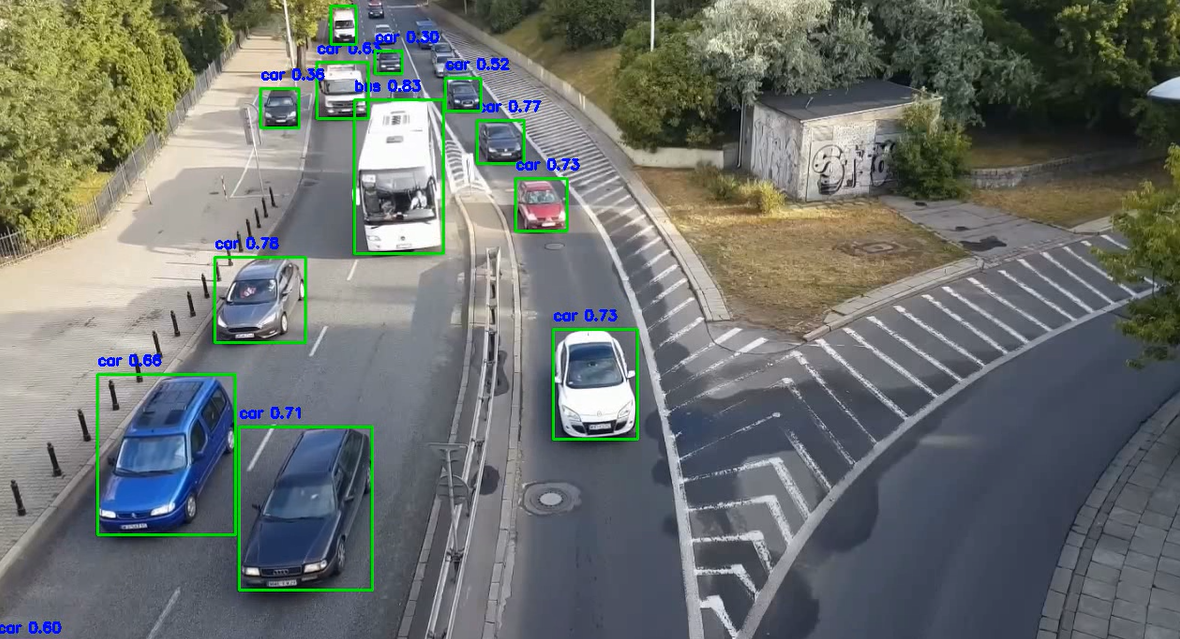